# 1. Introduction to the data set

 The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. You can read more about the data set [here](https://archive.ics.uci.edu/ml/datasets/automobile) and can download it directly from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data).

## TODO
* Read imports-85.data into a dataframe named cars. If you read in the file using pandas.read_csv() without specifying any additional parameter values, you'll notice that the column names don't match the ones in the [dataset's documentation](https://archive.ics.uci.edu/ml/datasets/automobile). Why do you think this is and how can you fix this?
* Determine which columns are numeric and can be used as features and which column is the target column.
* Display the first few rows of the dataframe and make sure it looks like the data set preview.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

carss=pd.read_csv('imports-85.data')

carss.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [2]:
pd.options.display.max_columns

20

In [3]:
pd.options.display.max_columns = 99

In [4]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 
        'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


In [5]:
cars=pd.read_csv('imports-85.data',names=cols)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-nul

### Select only the columns with continuous values from - https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names

In [7]:
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 
                          'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 
                          'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]

In [8]:
numeric_cars.head(3)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500


# 2. Data Cleaning

Based on the data set preview from the last step, we can tell that the normalized-losses column contains missing values represented using "?". Let's replace these values and look for the `presence of missing values` in other numeric columns. Let's also `rescale the values in the numeric columns` so they all range from 0 to 1.

## TODO:
* Use the DataFrame.replace() method to replace all of the ? values with the numpy.nan missing value.
* Because ? is a string value, columns containing this value were cast to the pandas object data type (instead of a numeric type like int or float). After replacing the ? values, determine which columns need to be converted to numeric types. You can use either the DataFrame.astype() or the Series.astype() methods to convert column types.
* Return the number of rows that have a missing value for the normalized-losses column. Determine how you should handle this column. You could:
  * Replace the missing values using the average values from that column.
  * Drop the rows entirely (especially if other columns in those rows have missing values).
  * Drop the column entirely.
* Explore the missing value counts for the other numeric columns and handle any missing values.
* Of the columns you decided to keep, normalize the numeric ones so all values range from 0 to 1.

In [9]:
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [10]:
# Because ? is a string value, columns containing this value were cast to the pandas object data type
# (instead of a numeric type like int or float)

numeric_cars['normalized-losses'].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [11]:
numeric_cars=numeric_cars.replace('?',np.nan)
numeric_cars.head(3)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500


In [12]:
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
normalized-losses    164 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-size          205 non-null int64
bore                 201 non-null object
stroke               201 non-null object
compression-rate     205 non-null float64
horsepower           203 non-null object
peak-rpm             203 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                201 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


In [13]:
numeric_cars=numeric_cars.astype(float)
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [14]:
# Because `price` is the column we want to predict, let's remove any rows with missing `price` values.
numeric_cars=numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [15]:
# Replace missing values in other columns using column means.
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [16]:
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [17]:
# Normalize all columnns to range from 0 to 1 except the target column.

col_price=numeric_cars['price']

# drop price column before scaing
numeric_cars=numeric_cars.drop(['price'],axis=1)

# min-max scaling
numeric_cars=(numeric_cars-numeric_cars.min())/(numeric_cars.max()-numeric_cars.min())

numeric_cars['price']=col_price
numeric_cars.head(3)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.125,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.125,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.125,0.495327,0.346939,0.166667,0.263158,16500.0


# 3. Univariate Model

## TODO:
* Create a function, named knn_train_test() that encapsulates the training and simple validation process. This function should have 3 parameters -- training column name, target column name, and the dataframe object.
  * This function should split the data set into a training and test set.
  * Then, it should instantiate the KNeighborsRegressor class, fit the model on the training set, and make predictions on the test set.
  * Finally, it should calculate the RMSE and return that value.
* Use this function to train and test univariate models using the different numeric columns in the data set. Which column performed the best using the default k value?
* Modify the knn_train_test() function you wrote to accept a parameter for the k value.
  * Update the function logic to use this parameter.
  * For each numeric column, create, train, and test a univariate model using the following k values (1, 3, 5, 7, and 9). Visualize the results using a scatter plot or a line plot.

In [18]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(df,train_col,target_col):
    knn=KNeighborsRegressor()
    
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index=np.random.permutation(df.index)
    random_df=df.reindex(shuffled_index)
    
    # Divide number of rows in half and round.
    row_half_len=int(df.shape[0]/2)
        
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_set=df[0:row_half_len]
    test_set=df[row_half_len:]

    knn.fit(train_set[[train_col]],train_set[target_col])
    predictions=knn.predict(test_set[[train_col]])
    mse=mean_squared_error(test_set[target_col],predictions)
    rmse=mse**(1/2)
    return rmse



In [19]:
# list of columns on which data to be trained
numeric_cars_cols=numeric_cars.columns
print(numeric_cars_cols)

# remove price column
numeric_cars_cols=numeric_cars_cols.drop('price')
numeric_cars_cols


Index(['normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')


Index(['normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg'],
      dtype='object')

In [20]:
# accuracy of diffrent features
feature_accuracy=[]
for feature in numeric_cars_cols:
    accuracy=knn_train_test(numeric_cars,feature,'price')
    feature_accuracy.append(accuracy)
    
feature_accuracy

[8131.436882072488,
 9969.243291700175,
 8304.189346264562,
 7110.412630045104,
 10839.693635873846,
 5166.828580646175,
 4190.43388788236,
 13397.091693481998,
 9334.714914185055,
 8096.301512113387,
 4267.730361029788,
 9759.209969770063,
 4814.77801484941,
 4628.7930938146865]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text xticklabel objects>)

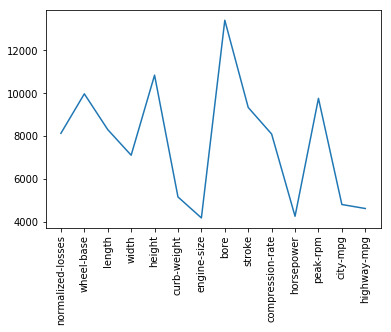

In [21]:
plt.plot(numeric_cars_cols,feature_accuracy)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text xticklabel objects>)

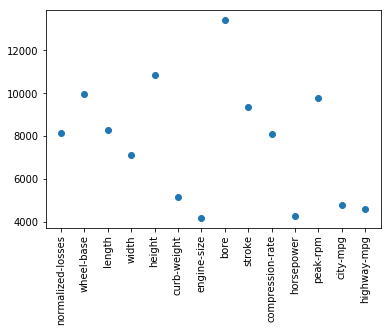

In [22]:
plt.scatter(numeric_cars_cols,feature_accuracy)
plt.xticks(rotation=90)

## Observation:
* width,engine_size,horse-power,city_mpg,highway_mpg are important features having low rms value ,according to this uni-variate model.

In [23]:
# Modifying the knn_train_test() function to accept a parameter for the k value.

def knn_train_test_(k,df,train_col,target_col):
    np.random.seed(1)
    
    # randomise rows
    shuffled_index=np.random.permutation(df.index)
    random_df=df.reindex(shuffled_index)
    
    # divide no of rows and round
    rows_half_len=int(df.shape[0]/2)
        
    # create train and test
    # first_half as train_set and second half as test set
    train_set=df[0:rows_half_len]
    test_set=df[rows_half_len:]
    
    # model training
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_set[[train_col]],train_set[target_col])
    
    # model predictions
    predictions=knn.predict(test_set[[train_col]])
   
    # model accuracy
    mse=mean_squared_error(test_set[[train_col]],predictions)
    rmse=mse**(1/2)
    
    return rmse
    

In [24]:
# list of columns on which data to be trained
numeric_cars_cols=numeric_cars.columns
print(numeric_cars_cols)

# remove price column
numeric_cars_cols=numeric_cars_cols.drop('price')
numeric_cars_cols


Index(['normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')


Index(['normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg'],
      dtype='object')

In [25]:
k_neighbors=[1,3,5,7,9]

# accuracy of all features for all k values
k_accuracy={}

for k in k_neighbors:
    feature_accuracy=[]
    k_accuracy[k]=feature_accuracy
    for feature in numeric_cars_cols:
        accuracy=knn_train_test_(k,numeric_cars,feature,'price')
        feature_accuracy.append(accuracy)
       
        
k_accuracy[1]

[19800.20478752528,
 17400.028096515132,
 19334.172930940473,
 17830.282235667957,
 19846.343667382596,
 16538.2927483526,
 14683.193281669473,
 24737.7937996586,
 16094.881308371623,
 12422.67109706899,
 17391.10799540718,
 17231.78289016329,
 11938.331627573643,
 13819.779918773147]

## #Other approach for knn_train_test_()

In [26]:
def knn_train_test_(df,train_col,target_col):
    np.random.seed(1)
    
    # randomise rows
    shuffled_index=np.random.permutation(df.index)
    random_df=df.reindex(shuffled_index)
    
    # divide no of rows and round
    rows_half_len=int(df.shape[0]/2)
        
    # create train and test
    # first_half as train_set and second half as test set
    train_set=df[0:rows_half_len]
    test_set=df[rows_half_len:]
    
    # Giving k values internally
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_set[[train_col]], train_set[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_set[[train_col]])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_set[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses
    
    
# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.

k_rmse_results = {}

train_cols = numeric_cars.columns.drop('price')
for col in train_cols:
    rmse_val = knn_train_test_(numeric_cars,col,'price')
    k_rmse_results[col] = rmse_val

k_rmse_results

{'normalized-losses': {1: 11628.904782718988,
  3: 9578.793245190305,
  5: 8131.436882072488,
  7: 7441.814253467208,
  9: 7644.0837748147915},
 'wheel-base': {1: 8052.050206913359,
  3: 9171.153878561105,
  5: 9969.243291700175,
  7: 8938.808809133783,
  9: 8637.3043859821},
 'length': {1: 10053.579063701594,
  3: 8230.050248540974,
  5: 8304.189346264562,
  7: 8483.928913734228,
  9: 7655.12304417215},
 'width': {1: 8044.1444455819,
  3: 7234.558219432825,
  5: 7110.412630045104,
  7: 6621.848358316696,
  9: 6531.417638109127},
 'height': {1: 13032.276289928392,
  3: 11411.019683044135,
  5: 10839.693635873846,
  7: 10041.327943738908,
  9: 9313.330965281266},
 'curb-weight': {1: 6566.749175404316,
  3: 5635.184748392448,
  5: 5166.828580646175,
  7: 5239.631250704795,
  9: 5244.5555635847895},
 'engine-size': {1: 5338.7918201602415,
  3: 4698.501673022703,
  5: 4190.43388788236,
  7: 4114.571307788718,
  9: 4056.629359658438},
 'bore': {1: 16502.858944335483,
  3: 13895.11178798717,

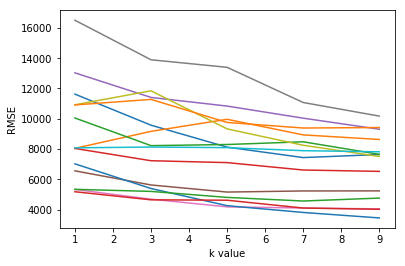

In [27]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

# 4. Multivariate Model

## TODO:
* Modify the knn_train_test() function to accept a list of column names (instead of just a string). Modify the rest of the function logic to use this parameter:
* Instead of using just a single column for train and test, use all of the columns passed in.
* Use a the default k value from scikit-learn for now (we'll tune the k value in the next step).
* Use the best 2 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.
* Use the best 3 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.
* Use the best 4 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.
* Use the best 5 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.
* Display all of the RMSE values.

In [28]:
# Compute average RMSE across different `k` values for each feature.
feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
sorted_series_avg_rmse = series_avg_rmse.sort_values()
print(sorted_series_avg_rmse)

sorted_features = sorted_series_avg_rmse.index

engine-size           4479.785610
highway-mpg           4522.911624
horsepower            4795.755143
city-mpg              4943.696718
curb-weight           5570.589864
width                 7108.476258
compression-rate      8007.936956
length                8545.374123
normalized-losses     8885.006588
wheel-base            8953.712114
stroke                9576.240416
peak-rpm             10154.303501
height               10927.529704
bore                 13009.824975
dtype: float64


In [29]:
def knn_train_test_m(df,train_df,target_col):
    np.random.seed(1)
    
    # randomise rows
    shuffled_index=np.random.permutation(df.index)
    random_df=df.reindex(shuffled_index)
    
    # find half length of dataset
    rows_half_length=int(df.shape[0]/2)
    
    # create train test dataset
    train_set=df[0:rows_half_length]
    test_set=df[rows_half_length:]
    
    # train model
    knn=KNeighborsRegressor()
    knn.fit(train_set[train_df],train_set[target_col])
    
    # test model
    predictions=knn.predict(test_set[train_df])
    accuracy=mean_squared_error(test_set[target_col],predictions)
    rmse=accuracy**(1/2)
    
    return rmse

k_rmse_results = {}

for nr_best_feats in range(2,7):
    k_rmse_results['{} best features'.format(nr_best_feats)] = knn_train_test_m(numeric_cars,
        sorted_features[:nr_best_feats],
        'price',)

k_rmse_results

{'2 best features': 4350.739368552121,
 '3 best features': 3553.981440358945,
 '4 best features': 3543.6021088353828,
 '5 best features': 3874.8264102159374,
 '6 best features': 4425.238850587895}

# 5. Hyperparameter Tuning

In [30]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [i for i in range(1, 25)]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

for nr_best_feats in range(2,6):
    k_rmse_results['{} best features'.format(nr_best_feats)] = knn_train_test(
        sorted_features[:nr_best_feats],
        'price',
        numeric_cars
    )

k_rmse_results

{'2 best features': {1: 3305.363752244746,
  2: 3115.414401578762,
  3: 3301.917929174058,
  4: 3112.073088639573,
  5: 3403.1775913137126,
  6: 3667.368602703689,
  7: 3838.34125755072,
  8: 4034.36109000524,
  9: 4167.0707782177105,
  10: 4222.293585362119,
  11: 4211.45089874391,
  12: 4178.839750547223,
  13: 4276.429315180832,
  14: 4341.306230243899,
  15: 4479.156474227716,
  16: 4479.189836502742,
  17: 4550.251385296861,
  18: 4643.977790054712,
  19: 4741.171815271031,
  20: 4791.5806711221385,
  21: 4806.603415496418,
  22: 4838.489812725282,
  23: 4852.267909507343,
  24: 4899.238787951828},
 '3 best features': {1: 3230.839016799699,
  2: 2928.705425661145,
  3: 3007.307032272999,
  4: 2997.365153367831,
  5: 3016.296368885275,
  6: 3244.1885360904607,
  7: 3452.0767040464684,
  8: 3704.502815096036,
  9: 3996.620365468681,
  10: 4182.436789246146,
  11: 4225.784154167984,
  12: 4303.879670438697,
  13: 4440.186130239356,
  14: 4486.417701207166,
  15: 4613.25144977313,
  1

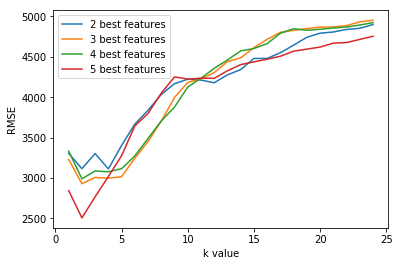

In [31]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())  
    plt.plot(x,y, label="{}".format(k))
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend()

That's it for the guided steps. Here are some ideas for next steps:

Modify the knn_train_test() function to use k-fold cross validation instead of test/train validation.

Modify the knn_train_test() function to perform the data cleaning as well.